# Functional API

## Functional API 모델의 필요성
- Sequential API 방식은 입력부터 출력까지 일직선으로 연결되어 있어 직관적이고, 편리한 장점이 있음
- 그러나, 여러 개의 층을 공유하거나 다양한 종류의 입력과 출력을 사용해서 복잡한 모델을 만드는 일에는\
일직선 구조로 인해 한계가 있음

## Functional API 모델 구축
1. 입력 데이터 shape을 tf.keras.layers.Input() 함수의 인자로 넣어주어 입력층을 정의
2. 이전 층 출력 값을 다음 층 함수의 입력 값으로 사용한 후에, 
3. tf.keras.models.Model() 함수에 입력과 출력을 넣어주어 모델 구축을 완성

## 1. MNIST 데이터 불러오기 및 정규화

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

(x_train, y_train),(x_test, y_test) = mnist.load_data() # 데이터 불러오기

x_train=x_train.reshape(-1, 28, 28, 1) # 텐서로 변환 (높이,너비, 채널)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0 # 정규화
x_test = x_test / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


## 2. Functional API CNN 모델 구축

In [2]:
input_ = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu')
x = x(input_)
# [동일코드] 1line으로 표현할 수 있으나 2line으로 표현하여 일반 함수 호출 경우로 혼동 가능성 있음.
#x=Conv2D(32, 3, activation='relu')(input_)

x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')
output_ = output_(x)
# [동일코드]
#output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_,  outputs=output_)

## 3. CNN 모델 컴파일 및 학습

In [3]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                             

In [4]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 91s 193ms/step - loss: 0.2322 - accuracy: 0.9291 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 2/30
469/469 [==============================] - 89s 191ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 3/30
469/469 [==============================] - 113s 242ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/30
469/469 [==============================] - 87s 185ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0355 - val_accuracy: 0.9885
Epoch 5/30
469/469 [==============================] - 99s 210ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 6/30
469/469 [==============================] - 116s 248ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 7/30
469/469 [==============================] - 121s 257ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0288 - val

## 4. 모델 (정확도) 평가

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0411 - accuracy: 0.9917


[0.04110472649335861, 0.9916999936103821]

## 5. 정확도 및 손실

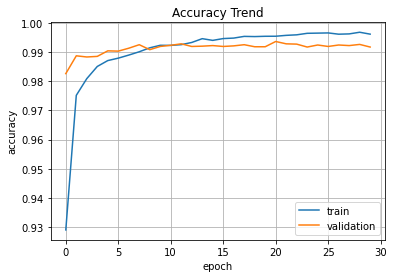

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

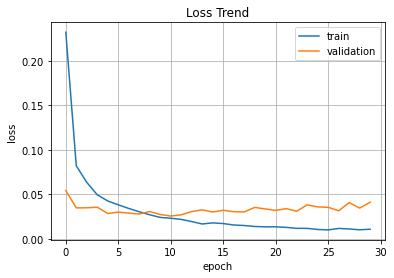

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()